# EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

<b>В рамках данной работы будут затронуты и выполнены следующие задачи:</b>
    
    1) Обработка данных;
    2) Работа с пропусками, дубликатами и выбросами;
    3) Создание новых признаков;
    4) Использование методов описательной статистики;
    5) Корреляции признаков;
    6) Визуализация данных;
    7) Исследование данных на предмет особенностей;
    


## Предобработка данных

Откроем данные и импортируем некоторые библиотеки

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('darkgrid')

m = pd.read_csv("marketing.csv")
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [3]:
m.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
m.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


Проверим на корректность интерпретации типов данных:

In [5]:

m.dtypes

#Представлены следующие типы данных:
#object/строки или смесь числовых и нечисловых;
#int64/целочисленные значения;


ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

Стоит отметить, что не все данные считались в удобном для работы формате, например, Dt_Customer 
представляет собой непривычный и не очень удобный для восприятия формат; 

Income, который представлен, как смесь числовых и нечисловых значений (object), в дальнейшем это станет проблемой, тк не получится использовать характерные для int64/float64 преобразования, например, при вызове(m.Income.mean())выйдет ошибка, хотя человек, работающий с данныйми хочет интепритировать Income как числовую переменную.

Теперь необходимо привести выделенные в предыдущем блоке признаки в корректный формат, начнем с <b>Income</b>:

In [5]:

m.Income = (m.Income.apply(lambda x: str(x).strip('$').replace(',', '').rstrip('.00'))).astype('float64')

#Проверка:
m.Income.dtype



dtype('float64')

<b>Dt_Customer:</b>

In [7]:

m.Dt_Customer = pd.to_datetime(m.Dt_Customer)

#Проверка:
m.Dt_Customer.dtype
#np.dtype('<M8[ns]') == np.dtype('datetime64[ns]') - проверка того, что <M8[ns] и datetime64[ns] эквивалентны.



dtype('<M8[ns]')

In [8]:
#Еще одна проверка проделанных изменений:
m[['Dt_Customer', 'Income']].head(15)

,Dt_Customer,Income
0,2014-06-16,84835.0
1,2014-06-15,57091.0
2,2014-05-13,67267.0
3,2014-05-11,32474.0
4,2014-04-08,21474.0
5,2014-03-17,71691.0
6,2014-01-29,63564.0
7,2014-01-18,44931.0
8,2014-01-11,65324.0
9,2014-01-11,65324.0


## Пропуски, выбросы и дубликаты

<b>Исследуем данные на предмет пропусков:</b>

In [9]:

m.isnull().sum() #Находим пропуски по столбцам, вывод: пропуски есть только в Income (24 пропуска)
#m.loc[m.Income.isnull()] - так можно подробнее изучить строки с пропущенными значениями

#Чаще всего пустые значения по числовым переменным заменяют на 0, среднее или медианное.
# m = m.fillna(0) - вариант замены на 0;
# m = m.fillna(m.Income.mean()) - вариант замены на средний Income;
# m = m.fillna(m.Income.median()) - вариант замены на медианный Income;


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


Я буду заменять на медианное значение, тк. замена на медиану чаще всего будет более релевантна, 
поскольку медианное значение менее чувствительно к выбросам, по сравнению со средним,
хотя в данном случае без разницы на что менять, тк медиана и среднее почти равны 
<br>(медиана = 51381.50; среднее = 52247.251354):


In [10]:

m.Income = m.Income.fillna(m.Income.median())
    
# Проверка:
m.isnull().sum() #- Теперь кол-во пропусков стало равно 0.



ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Больше пропусков не осталось...

<b>Исследуме данные на предмет дубликатов:</b>

In [11]:
m.duplicated().sum() #дубликатов нет

0

Также, по условию задачи все ID пользователей уникальны и не должны встречаться больше одного раза, в таком случае, проделаю проверку на дубликаты по ID.

In [23]:

# Проверим кол-во наблюдений 
# mbv.size #(=42952)

# Теперь дропнем дубликаты и проверим на наличие изменений:
mbv.drop_duplicates(subset='ID').size #(=42952)

# Как видно дубликатов не было, но такую проверку делать не помешает.


42952

<b>Исследуем данные на предмет выбросов:</b>

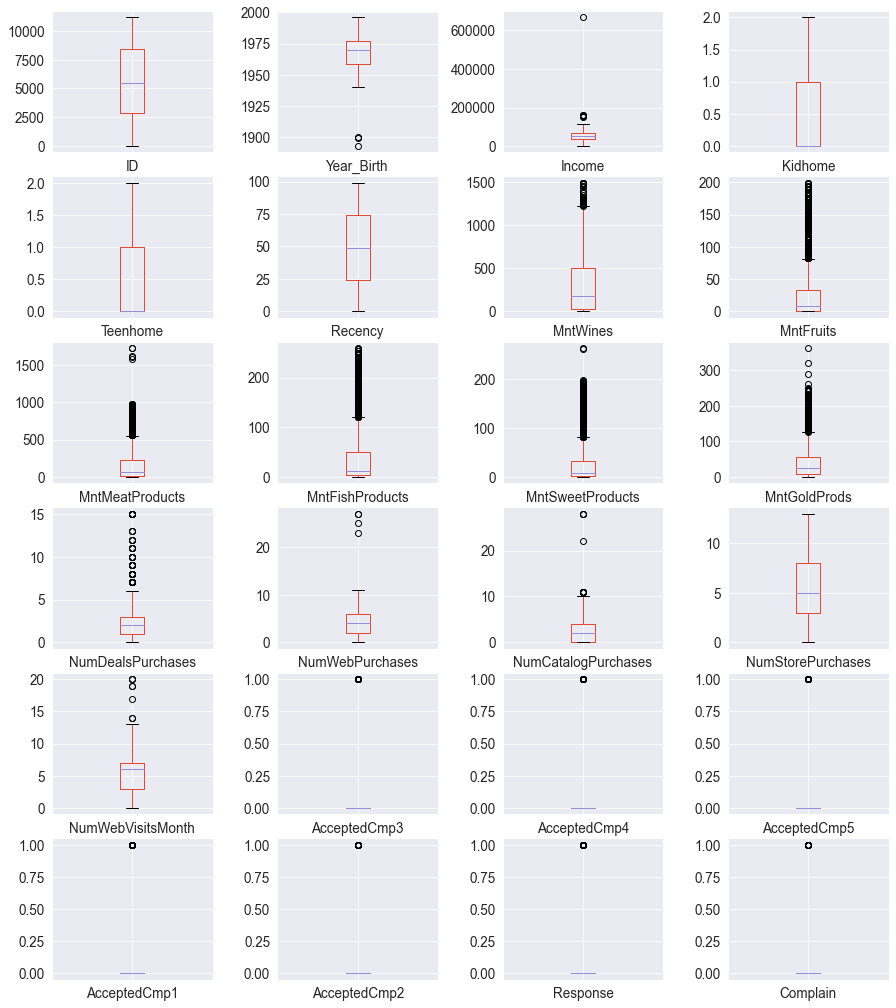

In [16]:
# Для начала построим графики по всем числовым переменным...

plt.figure(figsize=(15, 30))
plt.rcParams['font.size'] = '13.5'
plt.subplots_adjust(wspace=0.4, hspace=0.17)

for _, s in enumerate(list(m.select_dtypes(include=['float64', 'int64']))):
    ax = plt.subplot(10, 4, _+1)
    m.boxplot(s, ax=ax) 


# Как видно по графикам, многие признаки имеет выбросы, они обозначены кругами.
# Выбросы важно удалять, поскольку они мешают корректной интерпретации данных, искажают их, тк. выделяются из общей выборки. 

# Удаление выбросов происходит с использованием информации по квантилям. 
# Как известно, выбросы это те значения, которые меньше, чем (Q1 - 1.5(Q3-Q1)) и больше, чем (Q3 + 1.5(Q3-Q1)).

# Также можно численно оценить наличие выбросов, исопльзуя describe(), в случае Income, например, max = 666 666.000000,
# а 75% квантиль = 68289.750000 => наличие выбросов очевидно.



Создадим цикл и удалим выбросы, 
рассматриваться будут количественные переменные, за исключением ID, в нем удалять выбросы бессмысленно (каждый пользователь имеет уникальный ID и встречается только один раз), но в данном случае, я не буду вытаскивать ID из цикла удаления выбросов, тк никакие данные не пропадут.


<AxesSubplot:>

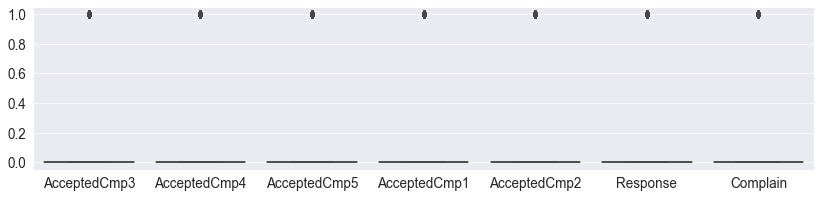

In [52]:

# Стоит отметить, что последние 7 параметров, которые также имеют dtype = int64 
# ('AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain')
# Являются бинарными числовыми, то есть числа в них не настоящие, соответсвтенно, такие параметры не будут 
# рассмотрены на предмет выбросов (в них всего лишь по два значения: 0 и 1).

#Проверка:
plt.rcParams['figure.figsize']=(14, 3)
sns.boxplot(data=m.iloc[:, -8:-1])



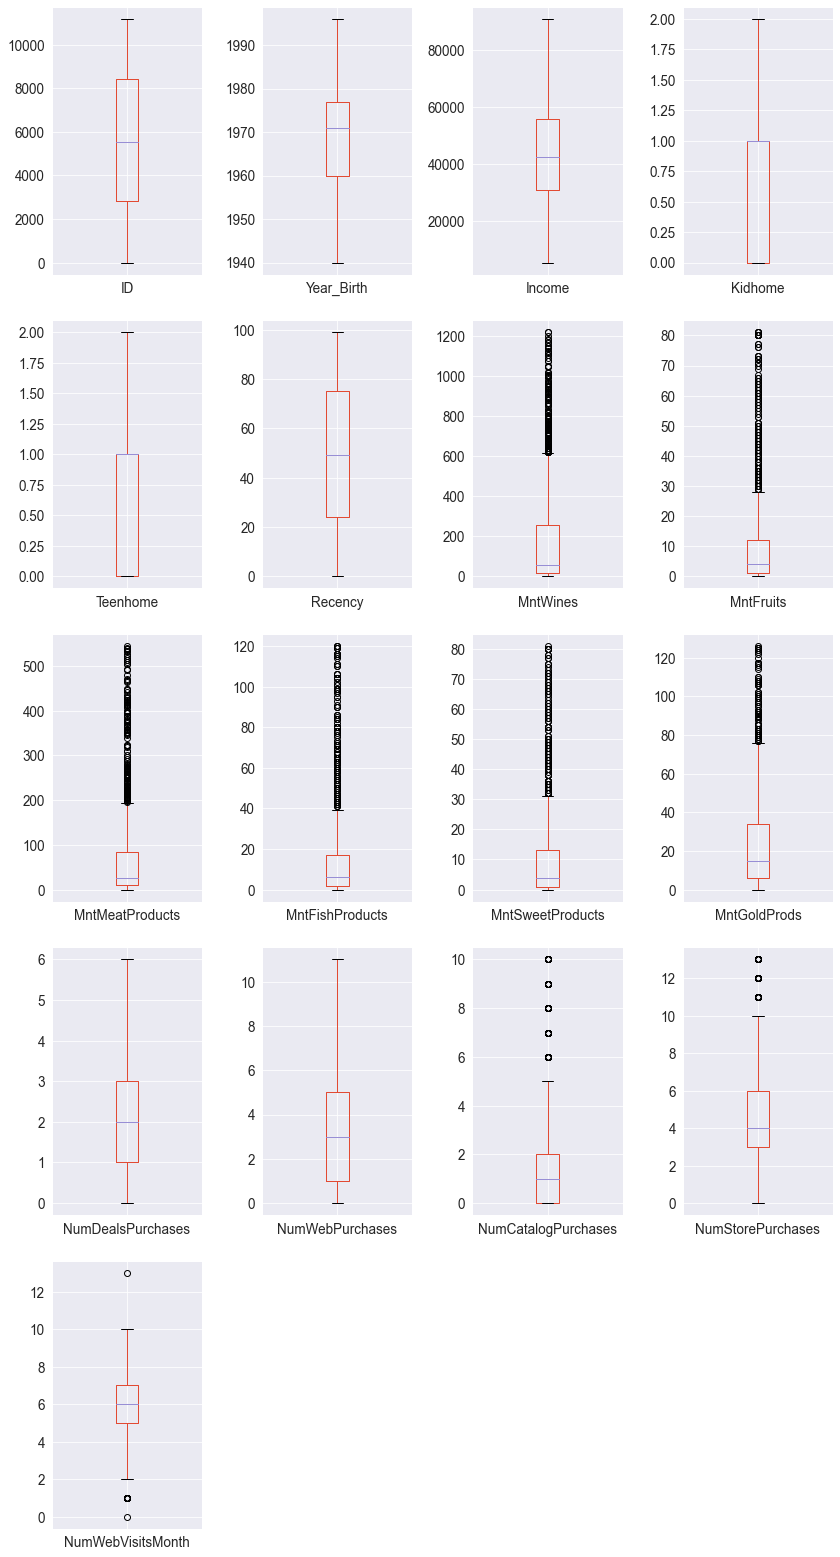

In [17]:
#https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
 
md = (m.select_dtypes(include=['int64', 'float64'])).iloc[:, :-7] #выделим все нужные признаки
mbv = m.copy() #создадим новый датафрейм
for i in list(md):
    q1, q3 = np.percentile(m[i], 25), np.percentile(m[i], 75)
    mx, mn = q3 + 1.5*(q3-q1), q1 - 1.5*(q3-q1)
    mbv[i] = mbv[i].loc[(mbv[i] >= mn) & (mbv[i] <= mx)]
mbv = mbv.dropna() #удаление значений, неудовлетворяющих условиям
    

plt.figure(figsize=(14, 28))
plt.rcParams['font.size'] = '13.5'
plt.subplots_adjust(wspace=0.4, hspace=0.17)

for _, s in enumerate(list(mbv.select_dtypes(include=['float64', 'int64']).iloc[:, :-7])):
    ax = plt.subplot(5, 4, _+1)
    mbv.boxplot(s, ax=ax) 
    
    

<b>В большинстве случаев, выбросы удалились, в других - они визуально остаются, тк появляются новые, из-за смещения плотности распределения (т.е. медиана и квантили смещаются).</b>

In [18]:

mbv.isnull().sum() #На всякий случай убедимся, что пропусков из-за удалений не появилось



ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [20]:

pd.set_option('display.max_columns', 500)
mbv.head(10) #Проверим не случилось ли каких-либо проблем



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1,1,1961.0,Graduation,Single,57091.0,0,0,2014-06-15,0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7,5.0,0,0,0,0,1,1,0,CA
2,10476,1958.0,Graduation,Married,67267.0,0,1,2014-05-13,0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5,2.0,0,0,0,0,0,0,0,US
3,1386,1967.0,Graduation,Together,32474.0,1,1,2014-05-11,0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2,7.0,0,0,0,0,0,0,0,AUS
4,5371,1989.0,Graduation,Single,21474.0,1,0,2014-04-08,0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2,7.0,1,0,0,0,0,1,0,SP
6,4073,1954.0,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769.0,80.0,252.0,15.0,34.0,65.0,1.0,10.0,10.0,7,6.0,1,0,0,0,0,1,0,GER
7,1991,1967.0,Graduation,Together,44931.0,0,1,2014-01-18,0,78.0,0.0,11.0,0.0,0.0,7.0,1.0,2.0,1.0,3,5.0,0,0,0,0,0,0,0,SP
8,4047,1954.0,PhD,Married,65324.0,0,1,2014-01-11,0,384.0,0.0,102.0,21.0,32.0,5.0,3.0,6.0,2.0,9,4.0,0,0,0,0,0,0,0,US
9,9477,1954.0,PhD,Married,65324.0,0,1,2014-01-11,0,384.0,0.0,102.0,21.0,32.0,5.0,3.0,6.0,2.0,9,4.0,0,0,0,0,0,0,0,IND
11,5642,1979.0,Master,Together,62499.0,1,0,2013-12-09,0,140.0,4.0,61.0,0.0,13.0,4.0,2.0,3.0,1.0,6,4.0,0,0,0,0,0,0,0,SP
13,2964,1981.0,Graduation,Married,26872.0,0,0,2013-10-16,0,3.0,10.0,8.0,3.0,16.0,32.0,1.0,1.0,1.0,2,6.0,0,0,0,0,0,0,0,CA


In [21]:
mbv.Year_Birth = mbv.Year_Birth.astype('int64') #Вернем признаку Year_Birth более удобный для восприятия формат.

In [22]:

mbv.head(10) #Теперь лучше


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7,5.0,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5,2.0,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2,7.0,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2,7.0,1,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769.0,80.0,252.0,15.0,34.0,65.0,1.0,10.0,10.0,7,6.0,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78.0,0.0,11.0,0.0,0.0,7.0,1.0,2.0,1.0,3,5.0,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384.0,0.0,102.0,21.0,32.0,5.0,3.0,6.0,2.0,9,4.0,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384.0,0.0,102.0,21.0,32.0,5.0,3.0,6.0,2.0,9,4.0,0,0,0,0,0,0,0,IND
11,5642,1979,Master,Together,62499.0,1,0,2013-12-09,0,140.0,4.0,61.0,0.0,13.0,4.0,2.0,3.0,1.0,6,4.0,0,0,0,0,0,0,0,SP
13,2964,1981,Graduation,Married,26872.0,0,0,2013-10-16,0,3.0,10.0,8.0,3.0,16.0,32.0,1.0,1.0,1.0,2,6.0,0,0,0,0,0,0,0,CA


## Новые признаки


Добавлю три переменные:
    
    1) Lifetime = {текущая дата} - {mbv.Dt_Customer} - {Recency} = сколько лет/дней покупатель пользуется нашими услугами
    (тут важно понимать, что стоит рассматривать параметр Recency, равный кол-ву дней с момента последней покупки,
     чтобы это понять достаточно просто представить такую ситуацию:
     Потребитель зарегистрировался 100 дней назад, но Recency = 90, т.е. потребитель сделал
     последнюю покупку через 10 дней после регистрации и все. В таком случае, стоит вычитать эти 90 дней, 
     чтобы получить более достоверную информацию о длительности пользования нашими услугами потребителем)
     Получится две переменные, одна - кол-во дней, другая - кол-во лет;
    
    
    
    2) Value = сумма всех параметров под 'Mnt', обозначающих траты на категории продуктов за последние 2 года, поделить на два;
    (относительная годовая "Ценность" потребителя);
    
    
    
    3) LTV (тут он получится не очень качественный, из-за недостатка некоторых показателей, но я все равно решил посчитать) 
     = {Lifetime} * {Value} = жизненная ценность потребителя. 
    (за lifetime будут браться годы)


In [25]:
# ДОБАВЛЕНИЕ LIFETIME:

# Создам переменную ct, равную текущему времени, после этого вычту Dt_Customer, 
# тогда получим параметр, сколько прошло времени с момента регистрации клиента,
# затем вычту Recency, чтобы избежать ситуаций, когда потребитель перестал у нас покупать.

# P.S. это не самый лучшый вариант получить те данные, которые я пытаюсь получить, тк клиент мог
# перестать покупать наши товары на 2 года, а затем снова начать, или он может покупать у нас раз в 
# 2 года, например. Но к сожалению в задаче нет никакой переменной, отражающей частоту покупок, только кол-во дней с последней

#https://dev-gang.ru/article/kak-poluczit-tekusczuu-datu-i-vremja-v-python-xaproxg292/

from datetime import datetime
ct = datetime.now()

mbv['Lifetime_days'] = (((ct - mbv.Dt_Customer).apply(lambda d: (d.days))) - mbv.Recency) #Кол-во дней от регистрации до сегодня с исключением промежутков, когда пользователь уже не покупает наши товары.
mbv['Lifetime_years'] = mbv.Lifetime_days/365 #Переведем в года
#print((mbv[['Lifetime_days', 'Lifetime_years']]).tail(25)) #-проверка 

#В дальнейшем пригодится только Lifetime_years.


In [32]:
# ДОБАВЛЕНИЕ VALUE:

val = [i for i in list(mbv) if 'Mnt' in i] #-создам список из переменных, которые здесь нужны
# Все они обозначают траты на разные категории продуктов.
#print(val) #-проверка, что все параметры есть в списке.

mbv['Value_year'] = (sum([mbv[i] for i in val]))/2 # делим на два, тк. начальные данные представлены за 2 года.

#Проверка:
val.append('Value_year')
mbv[val]


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Value_year
1,464.0,5.0,64.0,7.0,0.0,37.0,288.5
2,134.0,11.0,59.0,15.0,2.0,30.0,125.5
3,10.0,0.0,1.0,0.0,0.0,0.0,5.5
4,6.0,16.0,24.0,11.0,0.0,34.0,45.5
6,769.0,80.0,252.0,15.0,34.0,65.0,607.5
...,...,...,...,...,...,...,...
2232,55.0,0.0,6.0,2.0,0.0,4.0,33.5
2234,321.0,11.0,309.0,33.0,26.0,34.0,367.0
2235,372.0,18.0,126.0,47.0,48.0,78.0,344.5
2236,5.0,10.0,13.0,3.0,8.0,16.0,27.5


In [59]:
# ДОБАВЛЕНИЕ LTV:

mbv['LTV'] = mbv.Lifetime_years * mbv.Value_year 
mbv.LTV


1       2385.460274
2       1049.042466
3         46.004110
4        384.693151
6       5251.130137
           ...     
2232     279.289041
2234    3207.479452
2235    3193.939726
2236     258.273973
2237    1472.194521
Name: LTV, Length: 1534, dtype: float64

In [60]:
mbv.head(30) #Проверка того как выглядит датафрэйм теперь:

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Lifetime_days,Lifetime_years,Value_year,LTV
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7,5.0,0,0,0,0,1,1,0,CA,3018,8.268493,288.5,2385.460274
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5,2.0,0,0,0,0,0,0,0,US,3051,8.358904,125.5,1049.042466
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2,7.0,0,0,0,0,0,0,0,AUS,3053,8.364384,5.5,46.004110
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2,7.0,1,0,0,0,0,1,0,SP,3086,8.454795,45.5,384.693151
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769.0,80.0,252.0,15.0,34.0,65.0,1.0,10.0,10.0,7,6.0,1,0,0,0,0,1,0,GER,3155,8.643836,607.5,5251.130137
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78.0,0.0,11.0,0.0,0.0,7.0,1.0,2.0,1.0,3,5.0,0,0,0,0,0,0,0,SP,3166,8.673973,48.0,416.350685
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384.0,0.0,102.0,21.0,32.0,5.0,3.0,6.0,2.0,9,4.0,0,0,0,0,0,0,0,US,3173,8.693151,272.0,2364.536986
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384.0,0.0,102.0,21.0,32.0,5.0,3.0,6.0,2.0,9,4.0,0,0,0,0,0,0,0,IND,3173,8.693151,272.0,2364.536986
11,5642,1979,Master,Together,62499.0,1,0,2013-12-09,0,140.0,4.0,61.0,0.0,13.0,4.0,2.0,3.0,1.0,6,4.0,0,0,0,0,0,0,0,SP,3206,8.783562,111.0,974.975342
13,2964,1981,Graduation,Married,26872.0,0,0,2013-10-16,0,3.0,10.0,8.0,3.0,16.0,32.0,1.0,1.0,1.0,2,6.0,0,0,0,0,0,0,0,CA,3260,8.931507,36.0,321.534247


In [35]:
mbv.isnull().sum() #На всякий случай проверка на пропущенные значения

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Lifetime_days          0
Lifetime_years         0
Value_year             0
dtype: int64

## Описательные статистики

<b>Категориальные переменные:</b>

In [37]:

#mbv.columns.tolist() #так можно получиться список всех признаков.
l = ['Education',
 'Marital_Status',
    'Country'] #все категориальные перменные

mbv.describe(include='object')

# Здесь видно кол-во наблюдений, уникальных значений, самые часто встречаемые значения, частота top значений;

# Выводы: 
# 1) В выборке рассматривается 5 видов образования; продукция компании продается в 8 странах; семейное полож. клиентов можно разделить на 7 "вариантов";
# 2) В базе данных компании/в этом датасете (после удаления выбросов) всего 1534 клиента; 
# 3) Большая часть клиентов - окончили бакалавриат(Graduation); -таких клиентов 724;
# 4) Большая часть клиентов - женаты(Married); -таких клиентов 598;
# 5) Большая часть клиентов - из Испании(SP); -таких клиентов 764;



,Education,Marital_Status,Country
count,1534,1534,1534
unique,5,7,8
top,Graduation,Married,SP
freq,724,598,764


In [38]:
#Так можно получить массивы уникальных значений каждого параметра:
#mbv['Education'].unique() #-array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'])
#mbv['Marital_Status'].unique() #-array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone'])
#mbv['Country'].unique() #-array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'])

In [44]:
# mbv[l].value_counts() #-так можно посмотреть все количества комбинаций;
# mbv[l].value_counts().sort_values().head(30) #-так можно посмотреть самые редкие комбинации;

mbv[l].value_counts().head(30) #первые 30 комбинаций категориальных признаков

# Если ID в данных уникальны(а это так, поскольку я ранее проводил проверку с удалением дубликатов по ID),
# то кол-во комбинаций по переменным истинно отражают число пользователей, имеющих те или иные комбинации.

# mbv[l].value_counts().mean() #-среднее кол-во комбинаций (клиентов) по набору параметров, 
# оно равно 10.158940397350994
# mbv[l].value_counts().median() = 4.0, но по данным в таблице ниже видно, что первые 4 комбинации параметров
# значительно превосходят другие, т.е. можно сделать вывод, что большинство клиентов имеют именно такие 
# наборы катег. параметров, это может помочь лучше понять свою ЦА, составить портреты. Большинство клиентов -женаты, закончили бакалавриат(Graduation), живут в Испании(но эти выводы были получены и ранее, просто теперь это можно оценить в сравнении).
# Также, напрашивается вывод, что не только у женатых, но еще и у парочек спрос на наши продукты впринципе выше. -все эти выводы и те, которые были сделаны ранее уже существенно помогают определить ЦА компании. 

# P.S. Также видно, что люди, окончившие школу(Basic), не особо интересуются нашей продукцие.

Education   Marital_Status  Country
Graduation  Married         SP         151
            Together        SP          86
            Single          SP          80
PhD         Married         SP          74
Master      Married         SP          50
PhD         Together        SP          43
            Single          SP          41
Master      Together        SP          38
Graduation  Divorced        SP          33
            Married         CA          32
2n Cycle    Married         SP          29
Graduation  Married         SA          27
            Together        SA          25
PhD         Married         SA          24
            Divorced        SP          22
Graduation  Married         AUS         22
Master      Single          SP          20
Graduation  Together        CA          20
            Married         IND         19
            Single          SA          19
PhD         Together        SA          18
Graduation  Together        IND         18
            Marrie

In [25]:
mbv[l].value_counts().where((mbv[l].value_counts()<15)).count() 
#-так, например, можно узнать сколько наборов переменных ("портретов" потребителей по имеющимся параметрам) встречаются в кол-ве меньше Х;
# (В данном случае - меньше 15). 

120

In [26]:
pd.set_option('display.max_rows', 159)
mbv[l].value_counts().where(mbv[l].value_counts()<15).sort_values(ascending=False).dropna()

# Тут можно посмотреть наборы параметров, под котоыре подходит не такое большое кол-во клиентов.
# Продукция компании не слишком популярна у многих Вдов, Разведенных, YOLO(их всего 2). Также, очень мало клиентов из Черногории 

Education   Marital_Status  Country
Basic       Single          SP         13.0
Master      Married         SA         12.0
Graduation  Single          US         12.0
2n Cycle    Single          SP         12.0
PhD         Single          SA         12.0
Master      Divorced        SP         12.0
PhD         Widow           SP         12.0
Graduation  Single          AUS        11.0
Master      Married         CA         11.0
                            AUS        11.0
Graduation  Widow           SP         10.0
            Divorced        CA         10.0
PhD         Married         IND         9.0
Master      Single          CA          9.0
            Married         GER         9.0
2n Cycle    Married         GER         9.0
PhD         Together        CA          9.0
            Married         AUS         8.0
Master      Single          SA          8.0
            Together        CA          8.0
Graduation  Together        US          8.0
                            GER         

In [168]:
# Попробуем рассмотреть все в той же проекции, но с учетом ценности, которую пользователи приносят бизнесу

df = mbv[['Country', 'LTV', 'ID', 'Marital_Status', 'Education']]\
        .groupby(['Country', 'Marital_Status', 'Education'])\
        .agg({'ID': 'count', 'LTV': 'sum'}).rename(columns={'ID': 'Users', 'LTV': 'Value'})\
        .sort_values('Value', ascending=False)


df.style.set_properties(subset=['Value'], **{'width': '120px'})\
    .bar(subset='Value', color = '#FFA07A')


In [166]:
# Теперь учитвая только страны

dff = mbv[['Country', 'LTV', 'ID']].groupby('Country').agg({'ID': 'count', 'LTV': 'sum'})\
        .rename(columns={'ID': 'Users', 'LTV': 'Total_Value'}).sort_values('Total_Value', ascending=False)


dff.style.set_properties(subset=['Total_Value'], **{'width': '110px'})\
        .bar(subset='Total_Value', color = '#FFA07A')



,Users,Total_Value
Country,,
SP,764,1117126.783562
SA,218,314886.305479
CA,172,230424.826027
IND,110,155977.779452
AUS,111,149788.961644
GER,85,131320.821918
US,72,121420.782192
ME,2,9149.049315


Ничего не обычного, кол-во пользователей напрямую корреллирует с общими доходами из определенных регионов.
Попробуем теперь оценить средний чек, такая статистика может дать нам более полезные выводы.

In [179]:

dff['Average_Value'] = dff.Total_Value / dff.Users
#dff.sort_values('Average_Value', ascending=False)

dff.style.set_properties(subset=['Total_Value', 'Average_Value'], **{'width': '120px'})\
    .bar(subset='Average_Value', color='#FFA07A')

                         

,Users,Total_Value,Average_Value
Country,,,
SP,764,1117126.783562,1462.207832
SA,218,314886.305479,1444.432594
CA,172,230424.826027,1339.679221
IND,110,155977.779452,1417.979813
AUS,111,149788.961644,1349.450105
GER,85,131320.821918,1544.950846
US,72,121420.782192,1686.399753
ME,2,9149.049315,4574.524658


В Черногории всего 2 пользователя, поэтому не стоит придавать какого-либо значения такому высокому среднему чеку.
Что важно замеить, так США, Германия имеют более высокие средние чеки, чем Испания, которая приносит наибольший доход.


Изучение данных признаков, помогает лучше понять аудиторию компании. Соответственно, становится ясно, на ком следует акцентировать позиционирование компании, на какую аудиторию запускать таргет/кнткст рекламы, создавать уникальные предложения и тд. (В данном случае самые характерные потребители = женатые/парочки из Испании)

С другой стороны, полученные данные могут свидетельствовать о возможности активного расширения в Германии, США, поскольку в этих странах самые высокие средние чеки, но клиентов не так много, почему? высокая конкуренция или недостаток продвижения? сложно сказать оперируя только этими данными.  


P.S. Я не так много внимания уделял образованию клиентов, потому что это не слишком важный параметр для данной компании: сложно позициионировать свой продукт на людей с определенным образованием, когда твое предложение это продукты питания. Тут связь образования и Value, которое приносит пользователь, скорее всего, будет обосновано через Income, который почти точно коррелирует с образованием (далее это будет проверено).

<b>Количественные переменные:</b>

In [156]:
#mbv.columns.tolist()

pd.set_option('display.max_columns', 35)
mbv.describe(include=['int64', 'float64'])

#Отображены кол-во, среднее, стандартн. отклонение, мин. макс. значения, три квантиля.

#Выводы:
# 1) Средний возраст наших клиентов (на текущий момент) - 52-53 года;
# 2) Пользователи остаются лояльными и покупают продукцию компании на протяжении 8.7 лет в среднем, с удержанием у компании проблем нет; (Среднее и медианное по Lifetime_years);
# 3) Самый большой доход принесенный одним пользователем равен 8757 у.е, в то время как средний доход с пользователя равен 1401 у.е; (LTV);
# 4) В среднем самые прибыльные категории продуктов компании на одного пользователя - Вино и Мясо. ('Mnt...'); P.S. Прибыльность вина можно связать с тем, что б0льшая часть наших потребителей - женатые и парочки;
# 5) Мера разброса, т.е. разница в доходах наших клиентов относительно средней зп (43562) по выборке чаще всего равна 17130; (Income);
# 6) Самый большой перерыв относительно самой последней покупки равен 99 дням, то есть где-то 3 месяца, значит Churn Rate не очень большой; (Recency);


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Lifetime_days,Lifetime_years,Value_year,LTV
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.00000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,5599.842894,1969.389831,43562.040743,0.571056,0.55867,49.059974,189.250978,10.403520,70.374185,15.173403,10.472621,23.991525,2.260104,3.369622,1.502608,4.793351,5.925684,0.066493,0.063233,0.023468,0.023468,0.008475,0.103651,0.009778,3291.511082,9.017839,159.833116,1453.777907
std,3259.898299,11.325605,17130.157888,0.544051,0.54433,29.077090,266.511838,15.745017,100.901427,23.314127,15.752040,25.650912,1.364258,2.442479,1.950043,2.786311,1.961722,0.249223,0.243462,0.151434,0.151434,0.091696,0.304906,0.098433,201.681641,0.552552,192.064140,1758.015969
min,1.000000,1940.000000,5305.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2907.000000,7.964384,4.000000,33.775342
25%,2811.750000,1960.000000,30630.250000,0.000000,0.00000,24.000000,13.000000,1.000000,11.000000,2.000000,1.000000,6.000000,1.000000,1.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3117.000000,8.539726,24.500000,219.324658
50%,5515.000000,1971.000000,42344.000000,1.000000,1.00000,49.000000,53.500000,4.000000,26.000000,6.000000,4.000000,15.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3281.500000,8.990411,64.500000,584.303425
75%,8417.500000,1977.000000,55585.500000,1.000000,1.00000,75.000000,254.000000,12.000000,84.750000,17.000000,13.000000,34.000000,3.000000,5.000000,2.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3467.000000,9.498630,229.000000,2094.446918
max,11191.000000,1996.000000,90933.000000,2.000000,2.00000,99.000000,1218.000000,81.000000,545.000000,120.000000,81.000000,126.000000,6.000000,11.000000,10.000000,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3698.000000,10.131507,917.500000,9056.856164


<b>Попробуем сгруппировать некоторые количественные признаки:</b>

In [169]:
#Для этого добавлю новую переменную 'Age', которая будет показывать возраст клиента. Age равна текущему году - {Year_Birth}.

nowy = datetime.now().year
mbv['Age'] = (nowy - mbv.Year_Birth).astype('int64') #также уберу дробь;

mbv #-Проверка;

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Lifetime_days,Lifetime_years,Value_year,LTV,Age
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7,5.0,0,0,0,0,1,1,0,CA,3018,8.268493,288.5,2385.460274,61
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5,2.0,0,0,0,0,0,0,0,US,3051,8.358904,125.5,1049.042466,64
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2,7.0,0,0,0,0,0,0,0,AUS,3053,8.364384,5.5,46.004110,55
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2,7.0,1,0,0,0,0,1,0,SP,3086,8.454795,45.5,384.693151,33
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769.0,80.0,252.0,15.0,34.0,65.0,1.0,10.0,10.0,7,6.0,1,0,0,0,0,1,0,GER,3155,8.643836,607.5,5251.130137,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,7232,1973,Graduation,Widow,42429.0,0,1,2014-02-11,99,55.0,0.0,6.0,2.0,0.0,4.0,2.0,1.0,1.0,3,5.0,0,0,0,0,0,0,0,SP,3043,8.336986,33.5,279.289041,49
2234,9977,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321.0,11.0,309.0,33.0,26.0,34.0,3.0,9.0,3.0,5,4.0,0,0,0,0,0,0,0,US,3190,8.739726,367.0,3207.479452,49
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372.0,18.0,126.0,47.0,48.0,78.0,2.0,5.0,2.0,11,4.0,0,0,0,0,0,0,0,US,3384,9.271233,344.5,3193.939726,46
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5.0,10.0,13.0,3.0,8.0,16.0,1.0,1.0,0.0,3,8.0,0,0,0,0,0,0,0,SP,3428,9.391781,27.5,258.273973,45


In [171]:
mbv.Age.describe()

count    1534.000000
mean       52.610169
std        11.325605
min        26.000000
25%        45.000000
50%        51.000000
75%        62.000000
max        82.000000
Name: Age, dtype: float64

In [172]:
# Выбранные 3 количественных признака: 1)LTV; 2)Age; 3)Income;

z = ['LTV', 'Age', 'Income']
#mbv[z].describe()

pd.set_option('display.max_rows', 159) # отобразим всю таблицу
mbv.groupby(['Education', 'Marital_Status', 'Country']).agg({'LTV': ['mean', 'min', 'max', 'sum', 'count'], 'Age': ['mean'], 'Income': ['mean', 'min', 'max']}) 


# Вроде в задании не просят объяснять выбор статистик, но я взял 
# 1)'Жизненную ценность клиента' (LifetimeValue), тк это практически самое важное KPI для бизнеса.
# 2) Возраст, тк собираюсь понять какая примерная возрастная категория имеет больший спрос на продукты компании.
# 3) Доход клиента, чтобы также лучше понять ЦА.


LTV                            \
                                          mean          min          max   
Education  Marital_Status Country                                          
2n Cycle   Divorced       CA        438.808219   160.641096   716.975342   
                          GER       160.641096   160.641096   160.641096   
                          IND      2479.389041  2479.389041  2479.389041   
                          SA       2407.525114   151.802740  4919.116438   
                          SP        208.036712    61.063014   296.942466   
                          US       3634.538356  3634.538356  3634.538356   
           Married        AUS       477.987671   358.175342   597.800000   
                          CA        241.822260   169.260274   277.095890   
                          GER       905.171233   164.961644  5251.130137   
                          IND      2316.667123   107.595890  7328.723288   
                          SA        311.980822   220.828767   452.438356   
                          SP        877.034247    92.371233  4489.754795   
                          US        793.791781   793.791781   793.791781   
           Single         AUS       221.023973    89.839726   352.208219   
                          CA        269.687671   209.457534   329.917808   
                          GER       253.609589   253.609589   253.609589   
                          IND      1217.147945   761.657534  1585.689041   
                          SA       1647.429224    71.027397  3337.972603   
                          SP        681.563356   141.809589  3665.046575   
                          US        641.497260   641.497260   641.497260   
           Together       AUS       461.710502    99.663014   797.954795   
                          CA        629.760274   141.501370  2079.180822   
                          GER       794.100685    57.841096  2893.273973   
                          IND      1050.918265   247.938356  1661.557534   
                          SA        980.730137   238.843836  3211.178082   
                          SP        979.807877    99.663014  5892.427397   
                          US        386.563014   386.563014   386.563014   
           Widow          SA        104.004110   104.004110   104.004110   
                          SP       1715.320548   987.650685  2442.990411   
Basic      Divorced       CA        145.516438   145.516438   145.516438   
           Married        AUS        84.698630    84.698630    84.698630   
                          CA        328.636530   193.641096   510.626027   
                          GER       318.047260   281.642466   354.452055   
                          IND       173.060274   173.060274   173.060274   
                          SA        317.982192   152.372603   483.591781   
                          SP        356.832681    66.958904  1277.171233   
                          US        284.220548   272.800000   295.641096   
           Single         CA        224.280137   128.513699   320.046575   
                          IND       473.515068   473.515068   473.515068   
                          SA        185.835616    57.764384   313.906849   
                          SP        271.236143    90.558904   572.830137   
           Together       AUS       286.309589   114.186301   458.432877   
                          CA        123.587671   123.587671   123.587671   
                          IND       301.508904   207.401370   395.616438   
                          SA        205.919863   123.587671   288.252055   
                          SP        323.507306    81.591781   512.460274   
                          US        127.679452   127.679452   127.679452   
           Widow          AUS       422.112329   422.112329   422.112329   
Graduation Alone          CA        370.630137   370.630137   370.630137   
           Divorced       AUS      2474.246849    60.760274  6543.342466   
               

Выводы (некоторые были получены и ранее):
1) По всем видам образования и при любом семейном положении покупателей из Испании больше всего(если по этим категориям представители из Испании имеются). Почему так происходит? Возможно в Испании не так много доставок еды, Или спрос на нее выше, чем предложение, так или иначе, фокусироваться на клиентах из Испании - хорошая идея. 

2) Самую высокую прибыль с одного клиента, компания получает от клиентов из Черногории(ME) (но их всего лишь 2), также у клиентов из этой страны в среднем самые высокие доходы. Стоило бы разобраться почему клиентов всего 2...

3) Клиентов с высшим образованием гораздо больше, чем клиентов со средним, тк от этого зависят доходы, это еще раз подтверждает, что зп клиента оказывает немалое влияние на покупку продуктов у компании, скорее всего, это связано с частотой покупок. Т.е. чем выше доход, тем чаще происходят заказы.

4) Средний возраст клиентов = 52-53, но самый большой доход по категориям чаще всего приносят люди в возрасте от 45 до 59.
 
5) Как уже было получено ранее, самые крупные сегменты по образованию - Graduation, PhD, Master, по семейному положению - Married и Together. 


<b>Образование влияет на доходы, доходы влияют на частоту покупок или на размер одной покупки, чем выше частота покупок или размер одной, тем выше прибыль с клиента. Спрос на товары независимо от страны, образования, сем. полож. в большинстве своем имеют люди в возрасте от 45 до 62. Также парочки и женатые чаще являются заказчиками и приносят больше денег. Возможно они просто заказывают больше, либо они заказывают чаще.</b> 

## Корреляции:

<b>Попробуем найти три самых сильных линейных взаимосвязи:</b>

In [33]:
#mbv.corr() #-построение корелляционной матрицы;
#mbv.corr().Age.sort_values(ascending=False)
#(mbv.corr().unstack()).head(60)

#(((mbv.corr().unstack()).sort_values(ascending=False).head(60)))


#https://answacode.com/questions/17778394/perechislit-pary-s-naivysshej-korrelyaciej-iz-bolshoj-korrelyacionnoj-matricy-v-
c = mbv.corr()
c = c[c!=1.0]
(c.unstack().sort_values(ascending=False)).drop_duplicates().head(3)



#Самые сильные положительные корреляции
# 1) Длительность контакта с потребителем в днях и годах имеет максимальную положительную корреляцию, потому что это одно и то же, просто в разных единицах измерения. 
# 2) Ценность потребителя в год и жизненная ценность потребителя также имеют положительную очень высокую корреляцию, тут взаимосвязь тоже очевидна, тк. между параметрами наблюдается прямая пропорциональность, при росте одного - другое увеличивается. (LTV = {Value_year * Lifetime_years}).
# 3) Доходы в год с потребителя имеют полож. почти максимальную корреляцию с кол-вом трат клиента на винную продукцию. Тут тоже прямая взаимосвязь, тк. Вино, как было сказано ранее, в среднем приносит самый большой доход впрнцп, поэтому в доходности по всем категориям имеет самый высокий вес. При росте расходов на вино годовые доходы с потребителя увеличиваются.


Lifetime_days  Lifetime_years    1.000000
LTV            Value_year        0.996722
Value_year     MntWines          0.954548
dtype: float64

In [173]:
c = mbv.corr()
c = c[c!=1.0]
(c.unstack().sort_values(ascending=True)).drop_duplicates().head(3)

# Самые сильные отриц. корреляции
# 1) Возраст и Дата рождения очевидно имеют отрицательную максимальную корреляцию, чем больше год рождения, тем меньше возраст, т.е. чем позже родился челвоек, тем он младше.
# 2) Кол-во посещений веб сайта в месяц и доходы клиентов имеют среднюю отрицательную корреляцию.Т.е. чем выше доходы клиента, тем меньше он посещает сайт компании. Возможно это связано с тем, что при РАВНОМ спросе, человек с б0льшим доходом предпочтет делать покупки реже, но на большую сумму.
# 3) Ценность клиента в год и кол-во детей дома имеют среднюю отрицательную корреляцию. Т.е. чем больше детей у клиента, тем меньше прибыли он приносит. => возможно, что У людей с детьми спрос пониже. Но скорее всего это связано с потреблением вина, которое приносит больше всего денег компании, а если есть дети, то спрос на вино в семьях чаще всего понижается.


Year_Birth         Age       -1.000000
NumWebVisitsMonth  Income    -0.531347
Value_year         Kidhome   -0.517212
dtype: float64

## Визуализации

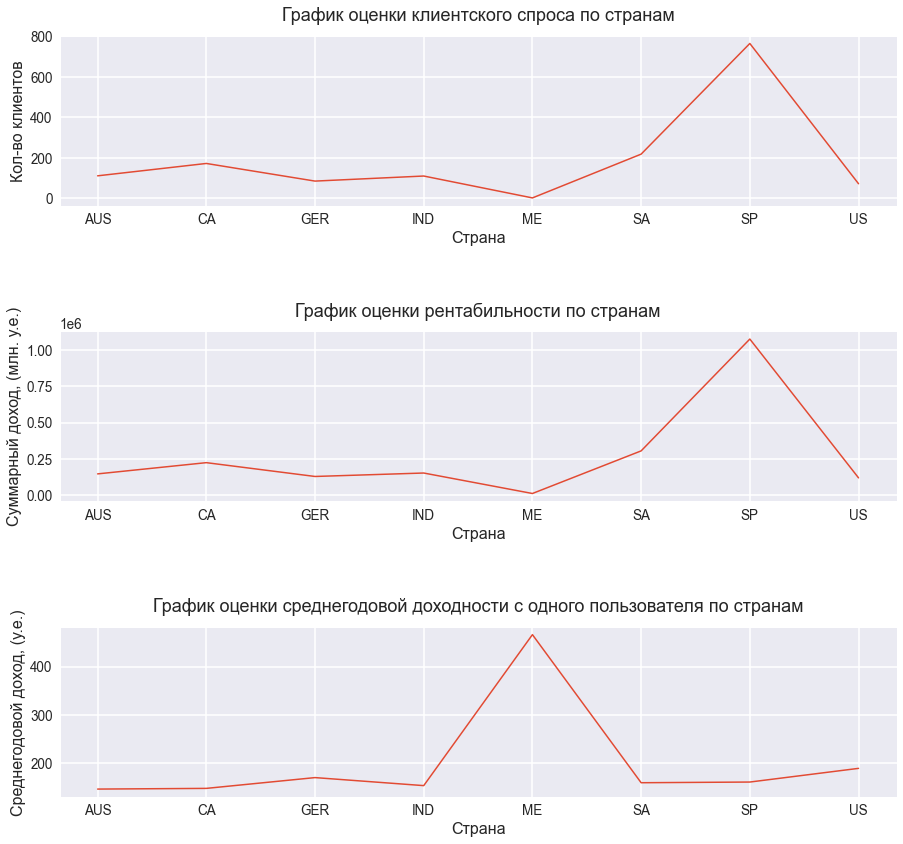

In [36]:
#1) 
fig, ax = plt.subplots(3,1, figsize=(15,14))
plt.subplots_adjust(hspace=0.74)


ax[0].plot(mbv.groupby('Country').ID.count()) #Кол-во пользователей в каждой стране.
ax[0].set_xlabel('Страна', fontsize=16), ax[0].set_ylabel('Кол-во клиентов', fontsize=16), ax[0].set_title('График оценки клиентского спроса по странам', fontsize=18, pad = 15)


ax[1].plot(mbv.groupby('Country').LTV.sum()) #Суммы всех доходов по странам.
ax[1].set_xlabel('Страна', fontsize=16), ax[1].set_ylabel('Суммарный доход, (млн. у.е.)', fontsize=16), ax[1].set_title('График оценки рентабильности по странам', fontsize=18, pad = 15)


ax[2].plot(mbv.groupby('Country').Value_year.mean()) #Средний доход с одного пользователя в год для каждой страны.
ax[2].set_xlabel('Страна', fontsize=16), ax[2].set_ylabel('Среднегодовой доход, (у.е.)', fontsize=16), ax[2].set_title('График оценки среднегодовой доходности с одного пользователя по странам', fontsize=18, pad = 15)


for i in range(3): 
    ax[i].grid(linewidth=1.6)

    
plt.rcParams['font.size'] = '15'


Пояснения:
1) На первом графике рассматривается Кол-во клиентов по странам. Как видно по графику и было выявлено еще очень давно - пользователей из Испании больше всего. 

2) На втором - рассматривается суммарный доход(LTV.sum()) с каждой страны. Видно, что график практически идеально совпадает с графиком кол-ва потребителей. Т.е. компания опирается на большое кол-во пользователей, а не на высокий чек.  

3) На последнем графике среднегодовой доход с отдельного пользователя (Value_year.mean()) по странам, это показывает, что потребители из Черногории являются самым платежеспособным сегментом, но проблема в том, что их всего два.   

(Text(0.5, 1.0, 'График средних доходов по странам'),
 Text(64.625, 0.5, 'Страна'),
 Text(0.5, 38.0, 'Средний доход'))

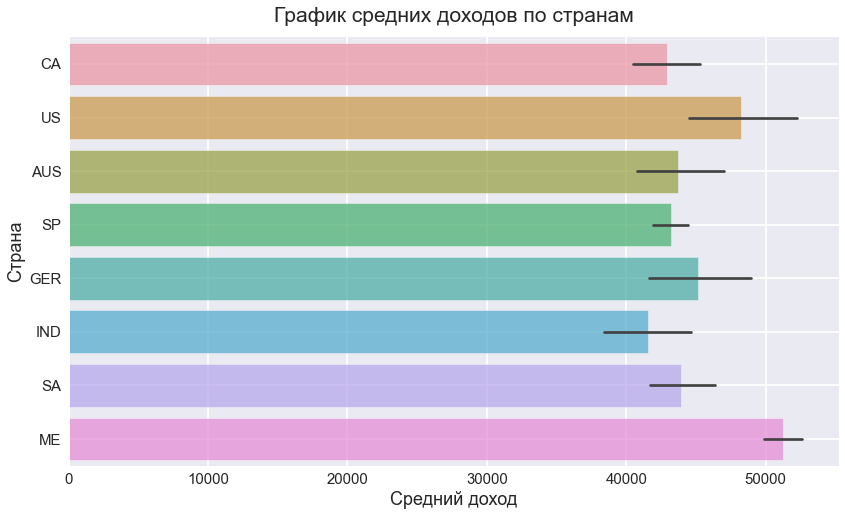

In [38]:
# 2)
f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='Income', y='Country', data=mbv, alpha=0.73) #-Средняя зп по странам. 


sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.grid(linewidth=1.8)
ax.set_title('График средних доходов по странам', fontsize=21, pad = 15), ax.set_ylabel('Страна', fontsize=18), ax.set_xlabel('Средний доход', fontsize=18)

Пояснение: 
Данный график отображает средние доходы по каждой стране, стоит вспомнить, что США, Германия, Черногория имеют самые высокие средние чеки на товары компании, что, как видно по графику, коррелирует с их доходами.

(Text(0.5, 29.0, 'Образование'),
 Text(658.9146245059287, 0.5, 'Семейное положение'),
 Text(0.5, 1.0, 'Суммарное LTV клиентов по признакам'))

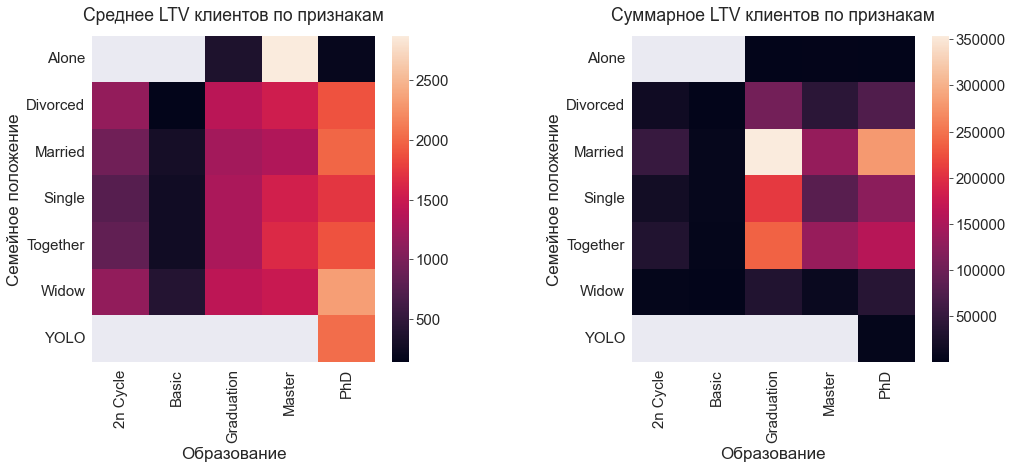

In [40]:
# 3)

htmp = mbv.pivot_table(index = 'Marital_Status', columns = 'Education', values = 'LTV')
htmpsum = mbv.pivot_table(index = 'Marital_Status', columns = 'Education', values = 'LTV', aggfunc='sum')
#htmp


f, ax = plt.subplots(1,2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.53)

sns.heatmap(data = htmp, ax = ax[0]) 
ax[0].set_xlabel('Образование', fontsize=17), ax[0].set_ylabel('Семейное положение', fontsize=17), ax[0].set_title('Среднее LTV клиентов по признакам', fontsize=17.5, pad = 15)


sns.heatmap(data = htmpsum, ax = ax[1])
ax[1].set_xlabel('Образование', fontsize=17), ax[1].set_ylabel('Семейное положение', fontsize=17), ax[1].set_title('Суммарное LTV клиентов по признакам', fontsize=17.5, pad = 15)


Пояснение:

Две тепловые карты, первая показывает Среднюю жизненную ценность потребителя с учетом признаков по Образованию и Семейному положению.

На втором - Суммарная жизненная ценность потребиетелей, попадающих под категории по тем же признакам.

Как видно, Одиночки-Магистры имеют самый высокий средний LTV. Также высокие показатели среди всех PhD(доктор наук) пользователей.

Тогда как Суммарный LTV самым высоким является у Женатых и Парочек.

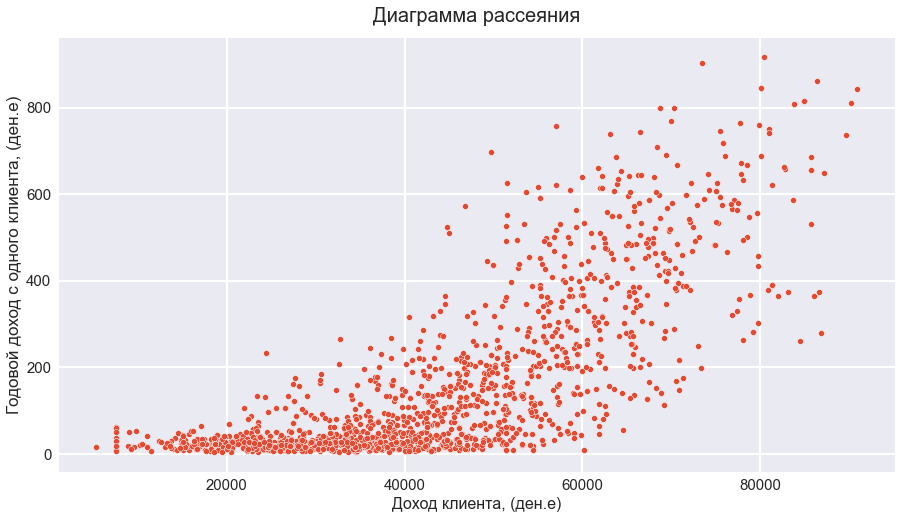

In [75]:
# 4) 
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=mbv, x='Income', y='Value_year', ax=ax)
ax.set_xlabel('Доход клиента, (ден.е)', fontsize=16), ax.set_ylabel('Годовой доход с одного клиента, (ден.е)', fontsize=17), ax.set_title('Диаграмма рассеяния', fontsize=20, pad = 15)
ax.grid(linewidth=2.1)

#mbv[['Income', 'Value_year']].corr().head(1)

In [76]:
# Пояснение:
# ScatterPlot показывает корреляцию двуж параметров, т.е. их взаимосвязь, как видно по графику, Доход потребителя (Income) 
# и Годовой доход компании С клиента (Value_year) имеет среднюю-высокую корреляцию. Т.е. потребители с более высокими доходами приносят больше денег.

# Эту корреляцию также просто так проверю кодом:
mbv[['Value_year', 'Income']].corr().head(1) #=0.765585 (корреляция >0.7 считается сильной).

,Value_year,Income
Value_year,1.0,0.765585



## Немного исследований

<b>Попробуем найти какую-то интересуню особенность в данных:</b>

In [174]:
mbv.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Lifetime_days,Lifetime_years,Value_year,LTV,Age
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.00000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,5599.842894,1969.389831,43562.040743,0.571056,0.55867,49.059974,189.250978,10.403520,70.374185,15.173403,10.472621,23.991525,2.260104,3.369622,1.502608,4.793351,5.925684,0.066493,0.063233,0.023468,0.023468,0.008475,0.103651,0.009778,3291.511082,9.017839,159.833116,1453.777907,52.610169
std,3259.898299,11.325605,17130.157888,0.544051,0.54433,29.077090,266.511838,15.745017,100.901427,23.314127,15.752040,25.650912,1.364258,2.442479,1.950043,2.786311,1.961722,0.249223,0.243462,0.151434,0.151434,0.091696,0.304906,0.098433,201.681641,0.552552,192.064140,1758.015969,11.325605
min,1.000000,1940.000000,5305.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2907.000000,7.964384,4.000000,33.775342,26.000000
25%,2811.750000,1960.000000,30630.250000,0.000000,0.00000,24.000000,13.000000,1.000000,11.000000,2.000000,1.000000,6.000000,1.000000,1.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3117.000000,8.539726,24.500000,219.324658,45.000000
50%,5515.000000,1971.000000,42344.000000,1.000000,1.00000,49.000000,53.500000,4.000000,26.000000,6.000000,4.000000,15.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3281.500000,8.990411,64.500000,584.303425,51.000000
75%,8417.500000,1977.000000,55585.500000,1.000000,1.00000,75.000000,254.000000,12.000000,84.750000,17.000000,13.000000,34.000000,3.000000,5.000000,2.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3467.000000,9.498630,229.000000,2094.446918,62.000000
max,11191.000000,1996.000000,90933.000000,2.000000,2.00000,99.000000,1218.000000,81.000000,545.000000,120.000000,81.000000,126.000000,6.000000,11.000000,10.000000,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3698.000000,10.131507,917.500000,9056.856164,82.000000


In [175]:
ll = ['Income', 'ID', 'Age', 'Country', 'LTV', 'Value_year', 'Lifetime_years', 'Marital_Status', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumCatalogPurchases']
mbv[ll].describe() # попробую взять меньше признаков.


#pd.set_option('display.max_rows', 1000)
#mbv[ll].sort_values('LTV').head(30)

,Income,ID,Age,LTV,Value_year,Lifetime_years,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,NumCatalogPurchases
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,43562.040743,5599.842894,52.610169,1453.777907,159.833116,9.017839,49.059974,3.369622,4.793351,5.925684,1.502608
std,17130.157888,3259.898299,11.325605,1758.015969,192.064140,0.552552,29.077090,2.442479,2.786311,1.961722,1.950043
min,5305.000000,1.000000,26.000000,33.775342,4.000000,7.964384,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30630.250000,2811.750000,45.000000,219.324658,24.500000,8.539726,24.000000,1.000000,3.000000,5.000000,0.000000
50%,42344.000000,5515.000000,51.000000,584.303425,64.500000,8.990411,49.000000,3.000000,4.000000,6.000000,1.000000
75%,55585.500000,8417.500000,62.000000,2094.446918,229.000000,9.498630,75.000000,5.000000,6.000000,7.000000,2.000000
max,90933.000000,11191.000000,82.000000,9056.856164,917.500000,10.131507,99.000000,11.000000,13.000000,13.000000,10.000000


In [176]:

mbv[ll].loc[mbv.Lifetime_years == mbv.Lifetime_years.max()]


,Income,ID,Age,Country,LTV,Value_year,Lifetime_years,Marital_Status,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,NumCatalogPurchases
79,27469.0,7990,75,CA,86.117808,8.5,10.131507,Married,2,0.0,3,6.0,0.0


Найденная мной особенность:

Самый первый клиент компании, который зарегистрировался 9.8 лет назад(самое высокое Lifetime_years), имея среднюю посещаемость веб сайта (NumWebVisitsMonth = 6), т.е, скорее всего, имеющий такой же спрос на товары компании, как и большинство клиентов, принес компании почти самый маленький доход из всевозможных по всей выборке (его LTV = 83 у.е.), несмотря на то,
что на текущую дату его последний заказ был сделан 2 дня назад. 

Более того, при довольно высокой посещаемости сайта (cредняя по выборке), этот клиент не сделал ни одного заказа через вебсайт,а сумма его расходов на все категории продуктов в год, представленные в сервисе IFood, равняется 8.5 у.е.

In [61]:

# Кажется, что это довольно интересное наблюдение, особенно потому что, при (Lifetime_years), 
# большем, чем 75% перцентиль(т.е. > 9.175342 лет), средняя Жизненная ценность клиента(LTV) равняется 1811 у.е.
# Медианная LTV = 889.046575 у.е, что все еще значительно больше, чем LTV данного клиента, которое равно 83.369863 у.е. 
# Суммарное LTV для клиентов, которые пользуются услугами компании на протяжении, большем, чем 9.17 лет, равняется 699135.591781 у.е.


mbv[['Lifetime_years', 'LTV']].loc[mbv.Lifetime_years > 9.175342].mean()
#mbv[['Lifetime_years', 'LTV']].loc[mbv.Lifetime_years > 9.175342].median()
#mbv[['Lifetime_years', 'LTV']].loc[mbv.Lifetime_years > 9.175342].sum()


Lifetime_years       9.427255
LTV               1811.232103
dtype: float64

In [37]:

# Почему так происходит?
# Рассмотрим какие именно категории продуктов приобретает этот клиент;

mbv.loc[mbv.ID == 7990, ['ID', 'Income', 'LTV', 'Lifetime_years', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Complain', 'Marital_Status', 'Education', 'Kidhome', 'Teenhome']]



,ID,Income,LTV,Lifetime_years,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Complain,Marital_Status,Education,Kidhome,Teenhome
79,7990,27469.0,83.369863,9.808219,9.0,1.0,2.0,3.0,2.0,0.0,0,Married,Graduation,0,0


Получается, что спрос имеется на практически все категории продуктов ('Mnt' != 0 в 5 из 6 случаев). Значит дело не в редких заказах чего-то определенного.

Также этот покупатель делает покупки исключительно в магазине (NumStorePurchases), поскольку показатель не очень высок, то, скорее всего, покупки делаются редко.

По Complain видно, что покупатель, скорее всего, не испытывает недовольства от пользоавния сервисом. Что же тогда мешает ему делать покупки чаще?

Возможно дело в доходе, который ниже чем 25% перцентиль по всей выборке и равен 27469. 

Немного подытожим промежуточный вывод:
Спрос имеется на 5/6 категорий продуктов, покупки происходят исключительно в магазинах очно и редко, жалобы отсутствуют, доходы не очень высокие.

Попробуем рассмотреть прочие факторы:
Детей маленьких/взрослых нет. Находится в браке. Имеет полное высшее образование.  

Предположение:
Возможно, что потребитель пользуется услугами компании IFood сезонно, например, в праздники. 
Тк. является клиентом компании уже 9.8 лет, не жалуется, а покупки делает редко, приэтом покупки происходят по 5/6 категориям.
Что примечательно, если покупки происходят редко, то покупатель сразу берет и сладости, и рыбу, и мясо, и вино. Более того, в Канаде(откуда и наш клиент) принято на праздники готовить блюда и из мяса, и из рыбы.
Причем траты на почти все категории, интересующие покупателя приблизительно равны(за исключением вина). 
При каких ситуациях клиент, делая редкие заказы, пойдет в магазин купить сразу вино, мясо, сладости, рыбу, фрукты, имея также не очень высокие доходы.

Все наблюдения сделанные выше, как мне кажется, выглядят достаточно убедительными, чтобы подтвердить начальное предположение.

<br>
<br>
<br>
=> Потребитель пользуется услугами компании IFood сезонно, скорее всего, в праздники. Именно поэтому пользуясь сервисом так долго (9.8 лет) он в сравнении со всеми потребителями почти не принес ей никаких денег.

Это также объясняет довольно низкие годовые затраты по категориям, ведь покупки делаются с расчетом, чтобы приготовить блюда на 1-2 дня максимум, чаще всего, просто на один вечер. 

